In [131]:
#Importing libraries
import pandas as pd
import numpy as np
import os

In [132]:
#Defining path
path = r'/Users/richardniyongabo/Desktop/Tasks_4.6_richard'

In [133]:
print(os.path.join(path,'orders_products_merged.pkl' ))

/Users/richardniyongabo/Desktop/Tasks_4.6_richard/orders_products_merged.pkl


In [134]:
#Import data 1
df_prods_ords_merged = pd.read_pickle(os.path.join(path, 'orders_productss_merged.pkl'))




In [135]:
df_prods_ords_merged.shape

(32434212, 17)

In [136]:
# creating a smaller subset of original data frame
df = df_prods_ords_merged[:1000000]

In [137]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_customer,product_name,aisle_id,department_id,prices,_merge
0,2,33120,1,1,3355525,202279,prior,3,5,9,8.0,False,Organic Egg Whites,86,16,11.3,both
1,26,33120,5,0,2549350,153404,prior,2,0,16,7.0,False,Organic Egg Whites,86,16,11.3,both
2,120,33120,13,0,395303,23750,prior,11,6,8,10.0,False,Organic Egg Whites,86,16,11.3,both
3,327,33120,5,1,976751,58707,prior,21,6,9,8.0,False,Organic Egg Whites,86,16,11.3,both
4,390,33120,28,1,2764474,166654,prior,48,0,12,9.0,False,Organic Egg Whites,86,16,11.3,both


In [138]:
# defining function to sort price ranges
def price_lable(row):
    if row['prices'] <= 5: 
        return 'Low-range product'
    elif (row['prices']>5) and (row['prices']<=15):
        return 'Mid-range product'
    elif row['prices'] >= 15:
        return 'High range'
    else: 
        return 'Not enough data'

In [139]:
# sort price ranges using user defined function
df['price_range'] = df.apply(price_lable, axis=1)

/var/folders/lt/x749qs4j6wvcvnsl38kfg1280000gn/T/ipykernel_44912/107243822.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['price_range'] = df.apply(price_lable, axis=1)


In [140]:
df.head()

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_customer,product_name,aisle_id,department_id,prices,_merge,price_range
0,2,33120,1,1,3355525,202279,prior,3,5,9,8.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product
1,26,33120,5,0,2549350,153404,prior,2,0,16,7.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product
2,120,33120,13,0,395303,23750,prior,11,6,8,10.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product
3,327,33120,5,1,976751,58707,prior,21,6,9,8.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product
4,390,33120,28,1,2764474,166654,prior,48,0,12,9.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product


In [141]:
df['price_range'].value_counts()

Mid-range product    983807
Low-range product     16193
Name: price_range, dtype: int64

# No high range and not enough data 

# Sorting price range using loc 

In [142]:
df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'

/var/folders/lt/x749qs4j6wvcvnsl38kfg1280000gn/T/ipykernel_44912/1169838859.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[df['prices'] > 15, 'price_range_loc'] = 'High-range product'


In [143]:
df.loc[(df['prices'] <= 15) & (df['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [144]:
df.loc[df['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [145]:
df['price_range_loc'].value_counts()

Mid-range product    983807
Low-range product     16193
Name: price_range_loc, dtype: int64

# Sorting price range using .loc for the entire data frame 

In [146]:
df_prods_ords_merged.loc[df_prods_ords_merged['prices'] > 15, 'price_range_loc'] = 'High-range product'

In [147]:
df_prods_ords_merged.loc[(df_prods_ords_merged['prices'] <= 15) & (df_prods_ords_merged['prices'] > 5), 'price_range_loc'] = 'Mid-range product'

In [148]:
df_prods_ords_merged.loc[df_prods_ords_merged['prices'] <= 5, 'price_range_loc'] = 'Low-range product'

In [149]:
# counting the price ranges in the data frame
df_prods_ords_merged['price_range_loc'].value_counts()

Mid-range product     21890146
Low-range product     10126384
High-range product      417682
Name: price_range_loc, dtype: int64

In [150]:
df_prods_ords_merged.head()

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_customer,product_name,aisle_id,department_id,prices,_merge,price_range_loc
0,2,33120,1,1,3355525,202279,prior,3,5,9,8.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product
1,26,33120,5,0,2549350,153404,prior,2,0,16,7.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product
2,120,33120,13,0,395303,23750,prior,11,6,8,10.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product
3,327,33120,5,1,976751,58707,prior,21,6,9,8.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product
4,390,33120,28,1,2764474,166654,prior,48,0,12,9.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product


In [151]:
# determining the busies days for ordering
df_prods_ords_merged['order_dow'].value_counts()

0    6209632
1    5665830
6    4500246
2    4217766
5    4209449
3    3844096
4    3787193
Name: order_dow, dtype: int64

# Defining new variable using loop

In [153]:
# defining new variable 'busiest day' using for loop
result = []

for value in df_prods_ords_merged['order_dow']:
  if value == 0:
    result.append("Busiest day")
  elif value == 4:
    result.append("Least busy")
  else:
    result.append("Regularly busy")

In [154]:
len(result)

32434212

In [155]:
df_prods_ords_merged['busiest_day'] = result
df_prods_ords_merged['busiest_day'].value_counts()

Regularly busy    22437387
Busiest day        6209632
Least busy         3787193
Name: busiest_day, dtype: int64

# Task 

In [156]:
# creating new variable 'busiest days'
result2 = []

for value in df_prods_ords_merged['order_dow']:
  if value in [0,1]:
    result2.append("Busiest days")
  elif value in [3,4]:
    result2.append("Slowest days")
  else:
    result2.append("Regularly busy")

In [157]:
len(result2)

32434212

In [158]:
df_prods_ords_merged['busiest_days'] = result2
df_prods_ords_merged['busiest_days'].value_counts()

Regularly busy    12927461
Busiest days      11875462
Slowest days       7631289
Name: busiest_days, dtype: int64

# Aggregated busiest days 

In [161]:
6209632 + 5665830

11875462

# Aggregated Slowest days 

In [162]:
3844096+3787193

7631289

# Aggregated regualary busy days

In [163]:
4500246+4217766+4209449

12927461

In [160]:
df_prods_ords_merged.head()

,order_id,product_id,add_to_cart_order,reordered,Unnamed: 0,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,new_customer,product_name,aisle_id,department_id,prices,_merge,price_range_loc,busiest_day,busiest_days
0,2,33120,1,1,3355525,202279,prior,3,5,9,8.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy
1,26,33120,5,0,2549350,153404,prior,2,0,16,7.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Busiest day,Busiest days
2,120,33120,13,0,395303,23750,prior,11,6,8,10.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy
3,327,33120,5,1,976751,58707,prior,21,6,9,8.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Regularly busy,Regularly busy
4,390,33120,28,1,2764474,166654,prior,48,0,12,9.0,False,Organic Egg Whites,86,16,11.3,both,Mid-range product,Busiest day,Busiest days


In [164]:
# Determining the busiest hours of the day
df_time = df_prods_ords_merged['order_hour_of_day'].value_counts()
df_time

10    2764390
11    2738585
14    2691563
15    2664522
13    2663272
12    2620800
16    2537469
9     2456661
17    2089452
8     1719952
18    1637922
19    1259382
20     977017
7      891928
21     796362
22     634737
23     402612
6      290770
0      218942
1      115786
5       88057
2       69431
4       53283
3       51317
Name: order_hour_of_day, dtype: int64

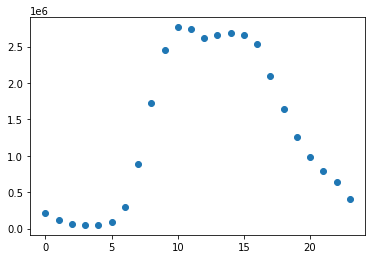

In [165]:
time = list(df_time.index)
frequency = list(df_time)
import matplotlib.pyplot as plt
plt.plot(time, frequency, 'o')

# Most orders categorised as from 10-15 Hours, average orders categorised other orders, 0-5 hours as fewest orders 

In [166]:
# define variable “busiest_period_of_day”

result3 = []

for value in df_prods_ords_merged['order_hour_of_day']:
  if value>=10 and value<=15:
    result3.append("Most orders")
  elif value<=5:
    result3.append("Fewest orders")
  else:
    result3.append("Average orders")

In [167]:
df_prods_ords_merged['busiest_period_of_day'] = result3
df_prods_ords_merged['busiest_period_of_day'].value_counts()

Most orders       16143132
Average orders    15694264
Fewest orders       596816
Name: busiest_period_of_day, dtype: int64

In [168]:
df_prods_ords_merged.to_pickle(os.path.join(path, 'orders_products_merged_ver2.pkl'))